In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- Age: It is the age of the patient
- Sex: Gender of the Patient (0 for female and 1 for male)
 -Ccp: Chest Pain and its levels
- trestbps: Blood Pressure in resting condition
- chol: Cholestrol level at admission 
- fbs: Fasting Blood Sugar
- ecg: Electro Cardiography at the restt condition
- thalac: The maximum heart rate achieved during the test
- exang: The exercise induced angina(Facing any discomfort or not)
- oldpeak: How much ecg changes as compared to rest during exercise
- slope: Slope of the ecg or st changes
- ca(coronary artery): The number of major blood vessels (0-3) coloured by fluroscopy
- thal (thalassemia): A blood disorder that can damage your heart
- Target: Wheather a patient is having any heart disease or not

In [11]:
# EDA
df.shape

(303, 14)

In [18]:
# Check in target column how many people are having heart disease and how many people are not having heart disease
# 1 --> Yes
# 0 --> No
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
# Data Cleaning

'''
Check for null values
Check for Duplicates
Check for outliers
'''

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(1)

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.duplicated().sum()

np.int64(0)

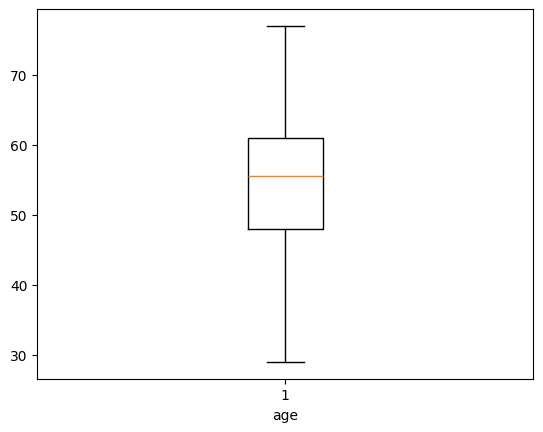

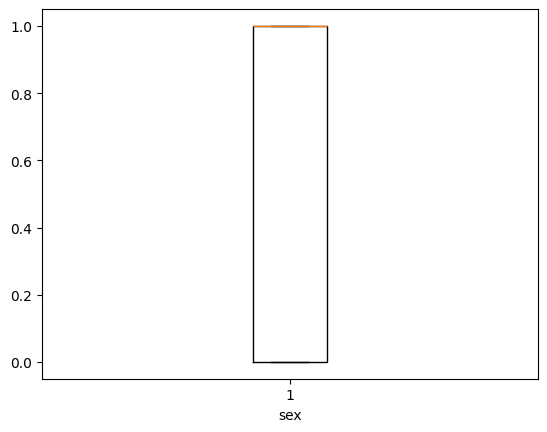

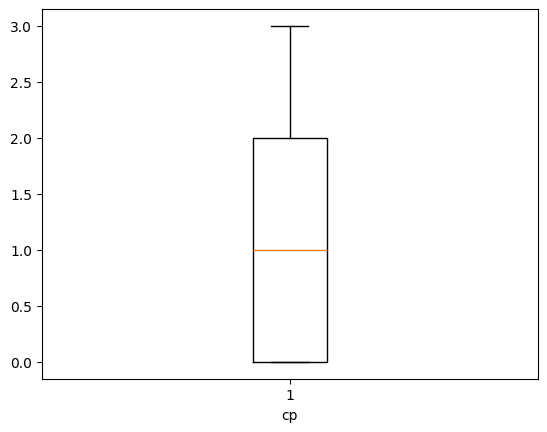

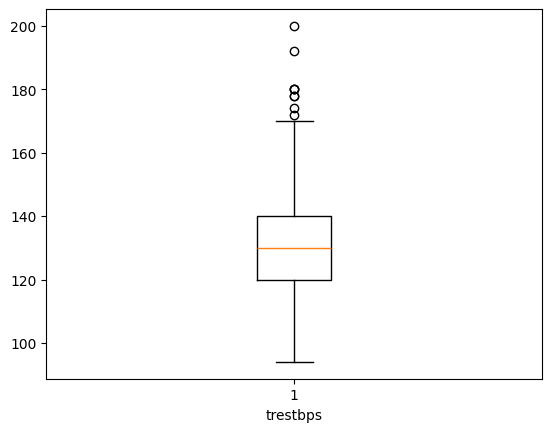

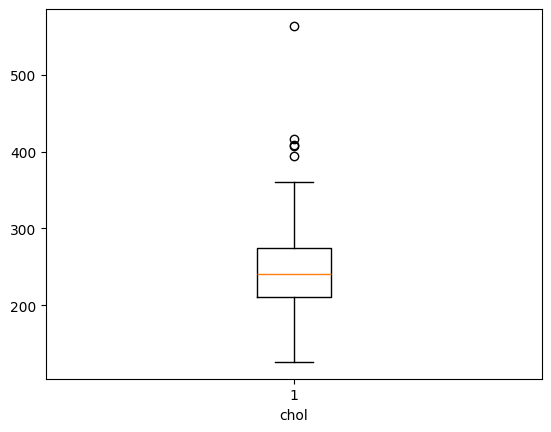

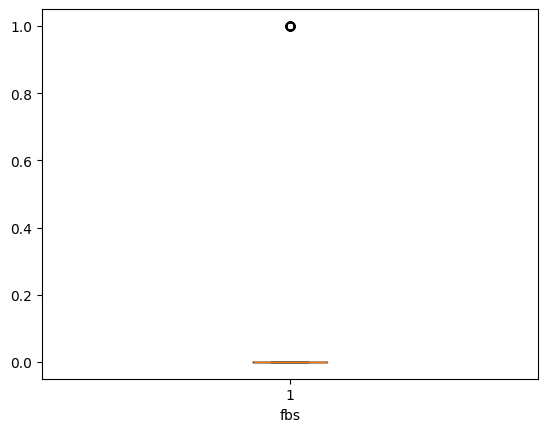

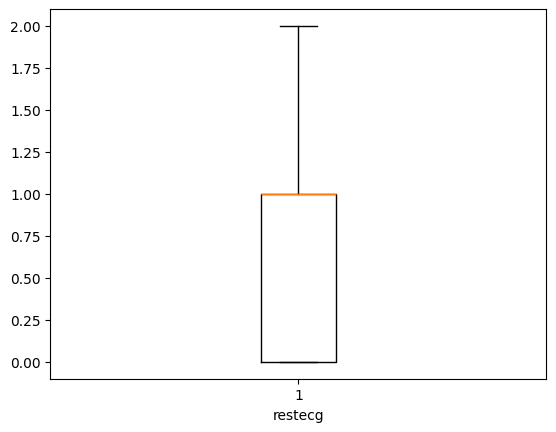

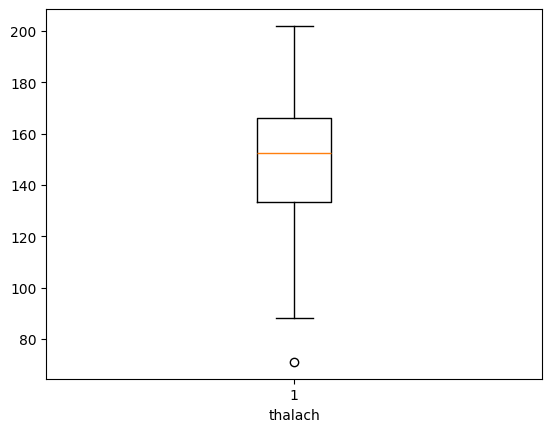

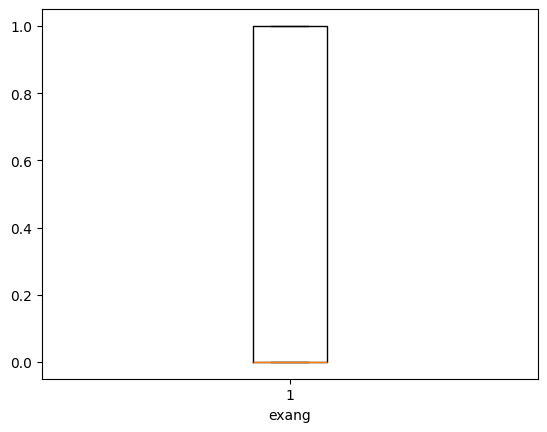

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
for i in df.columns:
    if(df[i].dtype == 'int64' or df[i] == 'float64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

# As tree algorithm dont have much effects of outliers. So we can skip the removal of outlier part

In [27]:
# Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
# Divide the data into independant and dependant part

x = df.drop(columns=['target'])
y = df['target']

In [35]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [44]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [45]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [49]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [50]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [51]:
model = DecisionTreeClassifier()

In [52]:
# Train the Model
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
# Test the model
y_pred = model.predict(x_test)

In [55]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
new_df = pd.DataFrame()
new_df['Actual Value'] = y_test
new_df['Predicted Value'] = y_pred
new_df

,Actual Value,Predicted Value
180,0,0
229,0,0
111,1,1
247,0,1
60,1,1
...,...,...
250,0,0
104,1,1
300,0,0
194,0,0


In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8032786885245902

In [59]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 8, 24]])

In [61]:
precision = precision_score(y_test, y_pred)
precision

0.8571428571428571

In [64]:
recall = recall_score(y_test, y_pred)
recall

0.75

[Text(0.5663265306122449, 0.9583333333333334, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.32142857142857145, 0.875, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.44387755102040816, 0.9166666666666667, 'True  '),
 Text(0.20408163265306123, 0.7916666666666666, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.12244897959183673, 0.7083333333333334, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.061224489795918366, 0.625, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.04081632653061224, 0.5416666666666666, 'x[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.02040816326530612, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.061224489795918366, 0.4583333333333333, 'x[10] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04081632653061224, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08163265306122448, 0.375,

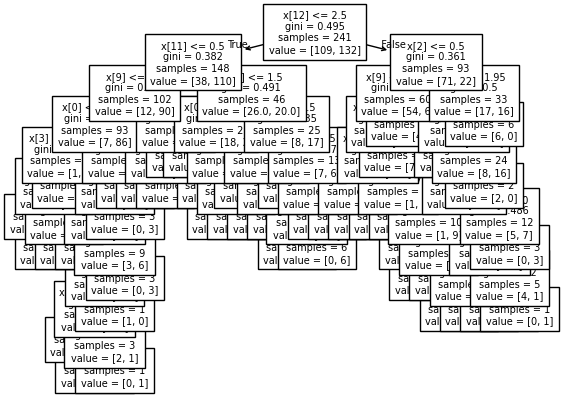

In [70]:
tree.plot_tree(model, fontsize = 7)

In [71]:
model.get_depth()  # Gives the depth of the tree

11

Testing different max depth to increase accuracy

In [90]:
depths = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for i in depths:
    model = DecisionTreeClassifier(random_state = 42, max_depth = i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print('Maximum depth:',i," ",'Accuracy Score:',acc)

Maximum depth: 1   Accuracy Score: 0.7213114754098361
Maximum depth: 2   Accuracy Score: 0.7377049180327869
Maximum depth: 3   Accuracy Score: 0.7868852459016393
Maximum depth: 4   Accuracy Score: 0.8032786885245902
Maximum depth: 5   Accuracy Score: 0.8032786885245902
Maximum depth: 6   Accuracy Score: 0.7704918032786885
Maximum depth: 7   Accuracy Score: 0.7704918032786885
Maximum depth: 8   Accuracy Score: 0.7868852459016393
Maximum depth: 9   Accuracy Score: 0.7704918032786885
Maximum depth: 10   Accuracy Score: 0.7868852459016393
Maximum depth: 11   Accuracy Score: 0.7704918032786885
Maximum depth: 12   Accuracy Score: 0.7704918032786885
Maximum depth: 13   Accuracy Score: 0.7704918032786885


In [91]:
model.get_depth()

11

In [92]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 42)

In [93]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [94]:
y_pred = model.predict(x_test)

In [95]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8032786885245902

# Hyperparameters:
They are the settings or the controls you choose before training your machine learning model.

1. max_depth - How deep the tree can grow.
   - If you set max_depth = 2, your tree can only make 2 levels of decision.
2. min_smaples_split -  This decides the minimum nuber of data points a node must have before it splits further.
   - If a node has 3 data points and min_smaple_split = 4 the tree says - very few data       points
3. min_samples_leaf - The minimum number of data points that must be present in the leaf node of the tree.
   - If we say in_samples_leaf = 2, it means that we can't make a leaf with only 1            sample, it will stop splitting earlier.

# **Grid Search CV**
- It helps us to find the best combination of these hyperparameters.
- It tries all the possible combination like, max_depth = 2 or 3, min_samples_split = 2 or 4, min_samples_leaf = 2 and checks which one gives the most accuracy using the cross validation.

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
new_model = DecisionTreeClassifier()

In [105]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'random_state': [0,1,2,3,4,5],
    'max_depth' : [1,2,5,10,50],
    'min_samples_split' : [2,6,8,3,9,5,22],
    'min_samples_leaf' : [1,4,6,7,9]
}

In [106]:
gv = GridSearchCV(estimator = new_model, param_grid = grid_params, cv = 3)

In [107]:
gv.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...], 'min_samples_leaf': [1, 4, ...], 'min_samples_split': [2, 6, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [108]:
gv.best_params_  #returns the best parameters for your model

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 22,
 'random_state': 0}

In [109]:
dt_model = gv.best_estimator_  # Create the model with these best parameters so to give best accuracy

In [110]:
y_pred = dt_model.predict(x_test)

In [113]:
acc = accuracy_score(y_pred,y_test)
acc

0.8032786885245902

[Text(0.5789473684210527, 0.9166666666666666, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.3684210526315789, 0.75, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.4736842105263158, 0.8333333333333333, 'True  '),
 Text(0.2631578947368421, 0.5833333333333334, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.21052631578947367, 0.4166666666666667, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.10526315789473684, 0.25, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]'),
 Text(0.3157894736842105, 0.25, 'x[0] <= 64.5\ngini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.2631578947368421, 0.08333333333333333, 'gini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.3684210526315789, 0.08333333333333333

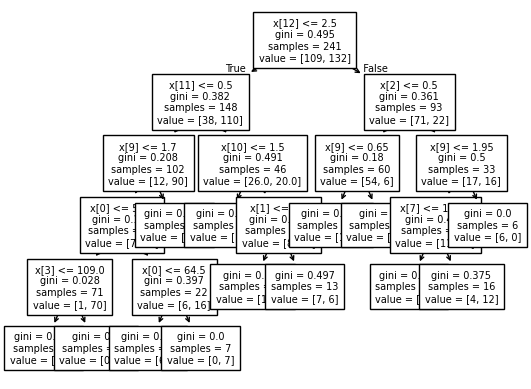

In [114]:
tree.plot_tree(dt_model, fontsize = 7)